# Vestas - Poland

In [47]:
from recast import CPT
import numpy as np
import csv

In [142]:
with open("/Users/niva/Desktop/Vestas/input_files/turbine_positions.csv", 'r') as f:
    data = list(csv.reader(f, delimiter=","))

In [143]:
data = np.array(data, dtype = np.float)
points = data[:,(3,2,-1)]
points[:,-1] = points[:,-1] + 72

In [144]:
layout = CPT()
layout.MESH_EXTENT = 5000 # m
layout.MESH_RES = 100
layout.AVERAGE_RANGE = 3500
layout.set_path('/Users/niva/Desktop/Vestas', 
                path_type = 'output')

# setting path to the landcover data 
layout.set_path('/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif', 
                path_type = 'landcover')

layout.set_utm_zone('33U')
layout.MAX_ELEVATION_ANGLE = 5

points[:,2] = points[:,2] + layout.get_elevation(utm_zone='33U', pts_utm=points)



Path /Users/niva/Desktop/Vestas set for storing CPT outputs
Path /Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif set for landcover data
Correct latitudinal zone!
Correct longitudinal zone!
UTM zone set
Correct latitudinal zone!
Correct longitudinal zone!


In [161]:
layout.add_measurement_instances(points = points, points_id = 'initial')
layout.optimize_measurements(points_id = 'initial')


Measurement points 'initial' added to the measurements dictionary!
Measurements dictionary contains 1 different measurement type(s).
Correct latitudinal zone!
Correct longitudinal zone!
Optimizing initial measurement points!
Correct latitudinal zone!
Correct longitudinal zone!
Measurement points 'optimized' added to the measurements dictionary!
Measurements dictionary contains 2 different measurement type(s).


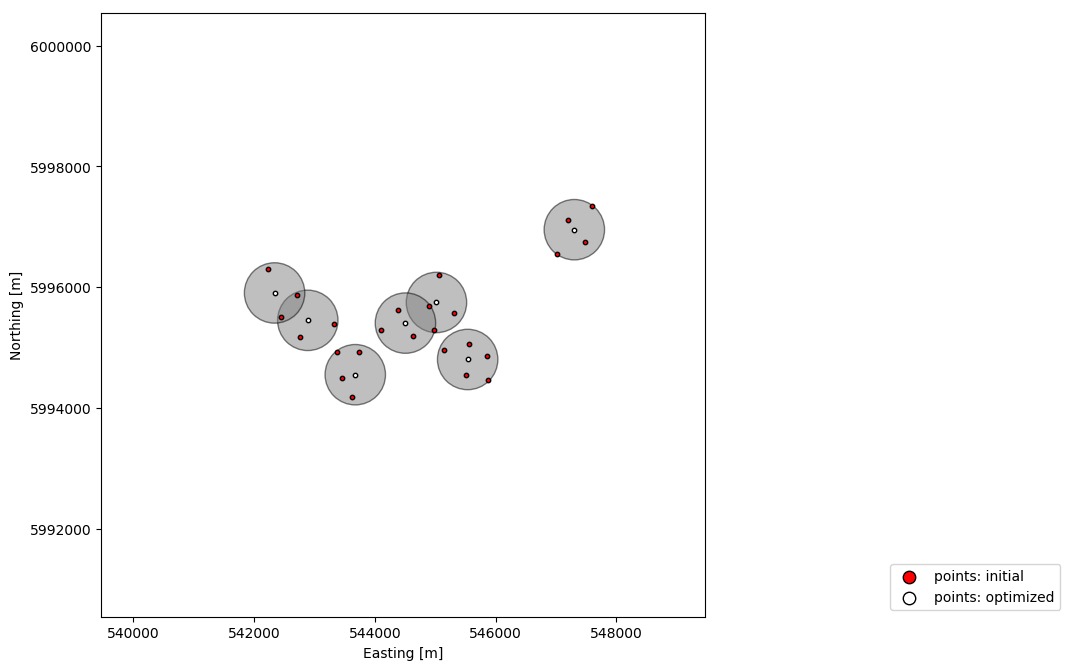

In [174]:
layout.plot_optimization(save_plot = True)

In [163]:
layout.generate_combined_layer(points_id = 'optimized')

Generating combined layer for optimized measurement points!
Correct latitudinal zone!
Correct longitudinal zone!
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Combined layer generated with landcover data!


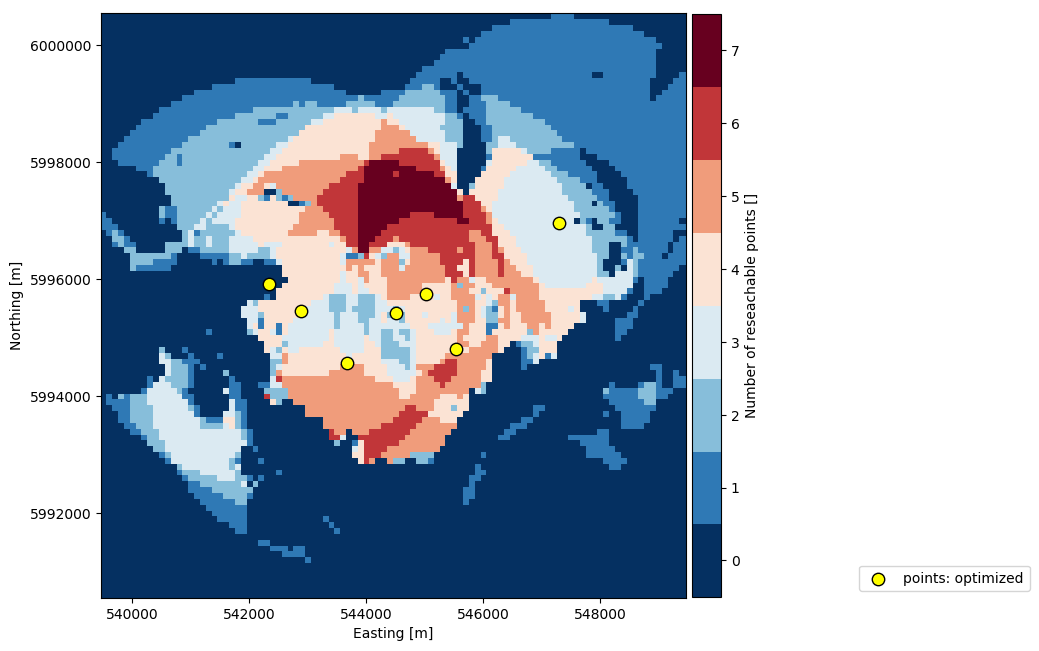

In [164]:
layout.plot_layer(layer_id = 'combined')

In [165]:
layout.export_layer(layer_id = 'combined')

Lidar 'koshava' added to the lidar dictionary, which now contains 2 lidar instance(s).
Updating lidar instance 'koshava' considering GIS layer 'combined'.


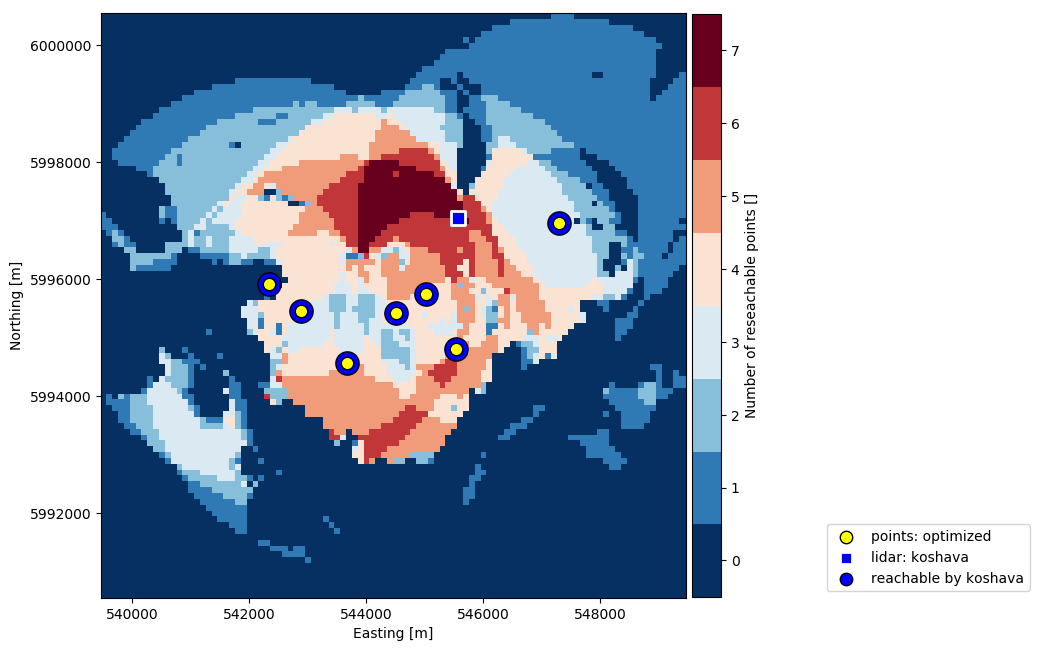

In [175]:
layout.add_lidar_instance(position = np.array([545674.83-100, 5996236.76 + 800, 32]),
                          lidar_id = 'koshava',
                          layer_id = 'combined')
layout.plot_layer(layer_id = 'combined', lidar_ids = ['koshava'], save_plot = True)

In [167]:
layout.generate_second_lidar_layer(lidar_id = 'koshava')

Updating lidar instance 'koshava' considering GIS layer 'combined'.


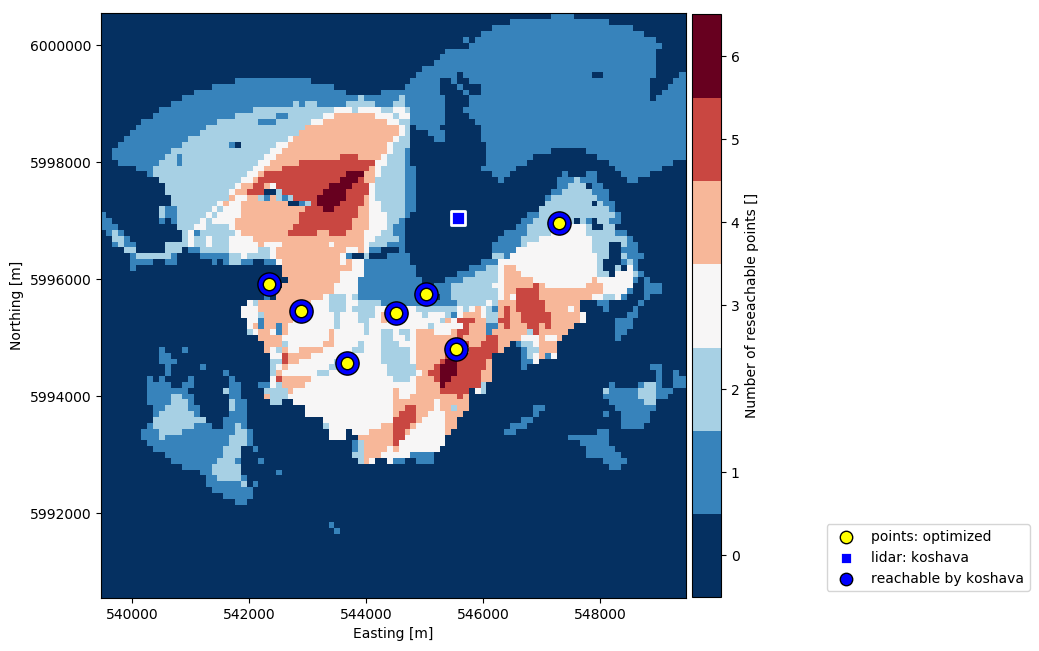

In [168]:
layout.plot_layer(layer_id = 'second_lidar_placement', lidar_ids = ['koshava'])

In [155]:
layout.export_layer(layer_id = 'second_lidar_placement')

Lidar 'bura' added to the lidar dictionary, which now contains 2 lidar instance(s).
Updating lidar instance 'bura' considering GIS layer 'second_lidar_placement'.


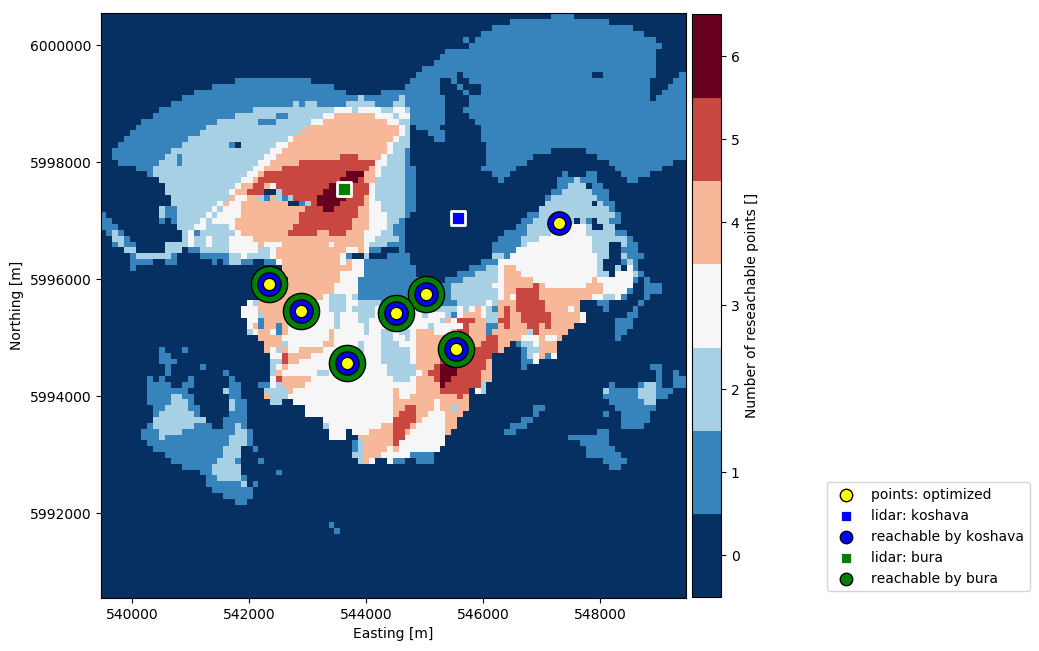

In [176]:
layout.add_lidar_instance(position = np.array([543729.48 - 100, 5996736.42 + 800, 33]),
                          lidar_id = 'bura', 
                           layer_id = 'second_lidar_placement')  
layout.plot_layer(layer_id = 'second_lidar_placement', 
                  lidar_ids = ['koshava', 'bura'], save_plot = True)

In [178]:
layout.optimize_trajectory(lidar_ids = ['koshava', 'bura'], 
                           sync = True, only_common_points = True )


Lidar instances:['koshava', 'bura'] will be updated with the optimized trajectory
Synchronizing trajectories for lidar instances:['koshava', 'bura']


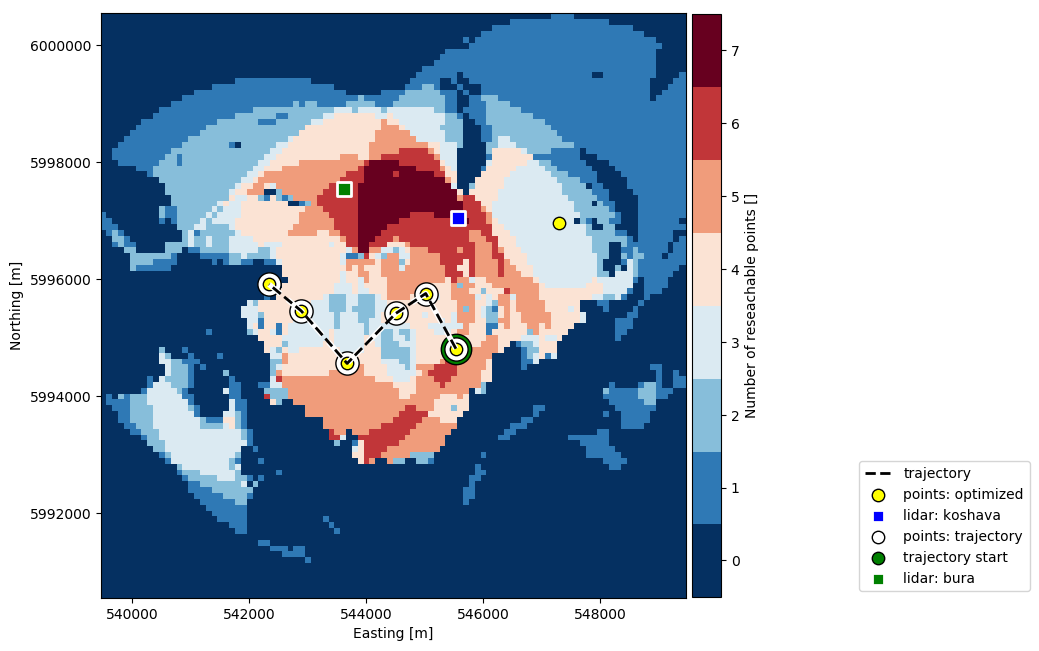

In [179]:
layout.plot_design(layer_id = 'combined', 
                   lidar_ids = ['koshava', 'bura'], 
                   savel_plot = True)

In [180]:
layout.ZOOM = 5
layout.export_measurement_scenario(lidar_ids = ['koshava', 'bura'])
layout.export_kml(lidar_ids = ['koshava', 'bura'], layer_ids = ['combined', 'second_lidar_placement'])

Measurement scenario export successful!
KML exported successful!
